# Pajaro vs avion

Es un pájaro? Es un avión? No! Es el tp final de IA de este año: clasificar **pájaros** vs **aviones** utilizando redes neuronales.

En este trabajo práctico vamos a utilizar redes neuronales para intentar clasificar imágenes, determinando si el objeto que se ve en la imagen es un pájaro o un avión. Para ello, ya contamos con un set de 10.000 imágenes clasificadas en las que estamos seguros de lo que se ve: o un pájaro o un avión. Con estos datos entrenaremos una red neuronal, que luego deberá ser capaz de clasificar correctamente imágenes similares.

In [1]:
# imports de libs que usamos para leer y procesar datos en masa
import numpy as np
import pandas as pd

# lib que usamos para mostrar las imágenes
import matplotlib.pyplot as plt

# libs que usamos para tareas generales de machine learning: separar conjuntos de datos, evaluar exactitud, etc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# libs que usamos para construir y entrenar redes neuronales
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout, Convolution2D, MaxPooling2D, Flatten

# configuración para que las imágenes se vean dentro del notebook
%matplotlib inline

In [6]:
# algunas configuraciones generales respecto a las imagenes
picture_size = 32
channels = 'rgb'

# nombres de las columnas de datos que vamos a usar como "entradas"
input_columns = []
for color in channels:
    input_columns.extend(['%s%i' % (color, i) for i in range(picture_size ** 2)])

## Datos

Leemos las 10.000 imagenes, que están guardadas en un solo archivo y mostramos 5 filas de ejemplo.  

Cada fila es una imagen. Cada imagen tiene muchos pixeles. Y cada pixel tiene 3 valores: cuánto de rojo, cuánto de verde y cuánto de azul (estos son "canales" de color).

Eso quiere decir que si la imagen tiene 32 x 32 pixeles, y cada pixel tiene 3 valores, entonces tenemos 32 x 32 x 3 = 3072 columnas.

La última columna, 'label', es un 0 cuando la imagen contiene un pájaro, y 1 cuando contiene un avión.

In [8]:
data = pd.read_pickle('./data.pkl')
data.sample(5)

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,b1015,b1016,b1017,b1018,b1019,b1020,b1021,b1022,b1023,label
9181,0.439216,0.380392,0.352941,0.349020,0.352941,0.349020,0.368627,0.368627,0.356863,0.368627,...,0.662745,0.815686,0.933333,0.882353,0.901961,0.992157,1.000000,0.886275,0.623529,0
3068,0.913725,0.921569,0.933333,0.945098,0.952941,0.964706,0.972549,0.980392,0.984314,0.988235,...,0.172549,0.203922,0.223529,0.121569,0.113725,0.141176,0.172549,0.313725,0.309804,1
526,0.701961,0.690196,0.678431,0.670588,0.670588,0.674510,0.678431,0.619608,0.576471,0.576471,...,0.721569,0.717647,0.713725,0.713725,0.709804,0.705882,0.701961,0.698039,0.694118,1
1120,0.937255,0.952941,0.984314,1.000000,0.992157,0.952941,0.909804,0.831373,0.800000,0.925490,...,0.858824,0.847059,0.819608,0.788235,0.756863,0.776471,0.815686,0.835294,0.792157,1
1906,0.086275,0.086275,0.086275,0.086275,0.090196,0.098039,0.098039,0.094118,0.090196,0.090196,...,0.937255,0.917647,0.941176,0.933333,0.858824,0.670588,0.627451,0.631373,0.615686,1


In [10]:
data.shape

(10000, 3073)

Esta función nos permite pasarle un conjunto de imagenes (filas de la tabla), y nos las dibuja. También admite usar alguna columna de la tabla como título para cada imagen

In [16]:
def show_images(samples, title=None):
    for index, sample in samples.iterrows():
        if title is not None:
            plt.title(str(sample[title]))

        sample_as_grid = sample[input_columns].values.reshape(len(channels), picture_size, picture_size)
        sample_as_grid = np.transpose(sample_as_grid, (1, 2, 0))
        plt.axis('off')
        plt.imshow(sample_as_grid, interpolation='nearest')

        plt.show()

Mostramos algunas imagenes de ejemplo al azar. Pueden ustedes distinguir lo que hay en cada imagen? (si ejecutan esta celda muchas veces, van a ir viendo imágenes diferentes)

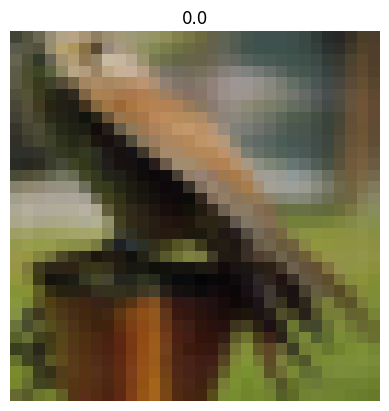

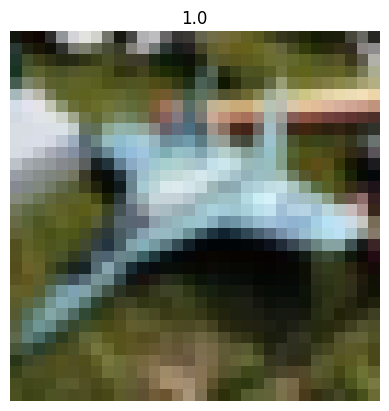

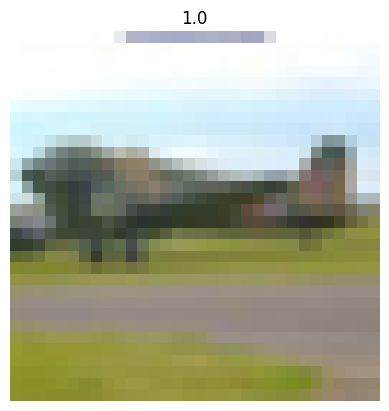

In [19]:
show_images(data.sample(3), title='label')

Y finalmente, separamos los datos en dos conjuntos, vamos a utilizar uno para entrenar la red y el otro para testearla (y de esa forma asegurarnos de que no estamos sobreentrenando, evaluar cómo se va a comportar con casos que no usó para entrenar, etc).

In [20]:
train, test = train_test_split(data, test_size=0.2)
sets = (
    ('train', train),
    ('test', test),
)

for set_name, set_data in sets:
    print('#' * 20, set_name, 'labels', '#' * 20)
    print(set_data.label.value_counts())
    print()

#################### train labels ####################
1    4017
0    3983
Name: label, dtype: int64

#################### test labels ####################
0    1017
1     983
Name: label, dtype: int64



## Red neuronal

Esta primer función es una comodidad, para no tener que repetir este fragmento de código cada vez que queramos alimentar a la red neuronal con datos de entrada. Lo que hace la función, es quedarse solo con los valores de las columnas de entrada.

In [21]:
def extract_inputs(dataset):
    return dataset[input_columns].values
    # return dataset[input_columns].values.reshape(len(dataset), picture_size, picture_size, len(channels))

Y aquí es donde ustedes tienen que completar su entrega:

In [22]:
model = Sequential([
    #Convolution2D(16, (4, 4), padding='valid', input_shape=(picture_size, picture_size, len(channels))),
    #Activation('tanh'),
    #Convolution2D(16, (4, 4)),
    #Activation('tanh'),
    #MaxPooling2D(pool_size=(4, 4)),
    #Dropout(0.1),
    #Flatten(),

    Dense(50, input_shape=(len(input_columns), )),
    Activation('tanh'),

    Dense(50),
    Activation('tanh'),
    
    Dropout(0.1),
    
    Dense(1),
    Activation('sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy',],
)

In [23]:
model.fit(
    extract_inputs(train), 
    train.label.values, 
    epochs=5,
    batch_size=128,
)

Epoch 1/5
63/63 [==============================] - 2s 3ms/step - loss: 0.5941 - accuracy: 0.6860
Epoch 2/5
63/63 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7592
Epoch 3/5
63/63 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.7669
Epoch 4/5
63/63 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7725
Epoch 5/5
63/63 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.7804


Una vez entrenada, pueden evaluar la performance de la red neuronal utilizando los dos conjuntos, con este fragmento de código.

El valor que tienen que lograr que llege a 80% (0.8) o más, es accuracy en el conjunto de test.

In [25]:
for set_name, set_data in sets:
    labels = set_data.label.values
    predicted_labels = np.rint(model.predict(extract_inputs(set_data)))

    print('#' * 25, set_name, '#' * 25)
    print('accuracy', accuracy_score(labels, predicted_labels))
    print(classification_report(labels, predicted_labels))

250/250 [==============================] - 0s 917us/step
######################### train #########################
accuracy 0.78825
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      3983
           1       0.75      0.86      0.80      4017

    accuracy                           0.79      8000
   macro avg       0.79      0.79      0.79      8000
weighted avg       0.79      0.79      0.79      8000

63/63 [==============================] - 0s 970us/step
######################### test #########################
accuracy 0.7765
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1017
           1       0.74      0.83      0.79       983

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



Finalmente, podemos clasificar todas las imágenes del conjunto de test, y mostrar algunos ejemplos de casos que anduvieron bien y casos que anduvieron mal.

El título en cada imagen es la salida de la red neuronal: más cerca de 1 significa avión, más cerca de 0 significa pájaro.

In [26]:
test_with_predictions = test.copy()
test_with_predictions['prediction'] = model.predict(extract_inputs(test_with_predictions))
test_with_predictions['predicted_label'] = np.rint(test_with_predictions.prediction)
is_correct = test_with_predictions.label == test_with_predictions.predicted_label

63/63 [==============================] - 0s 1ms/step


Bien clasificados:

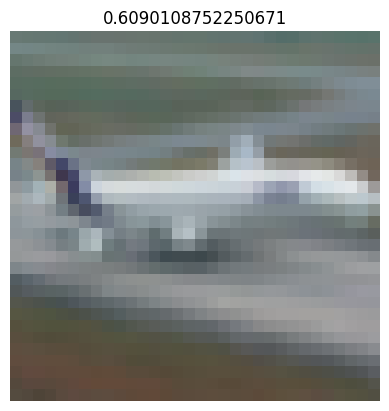

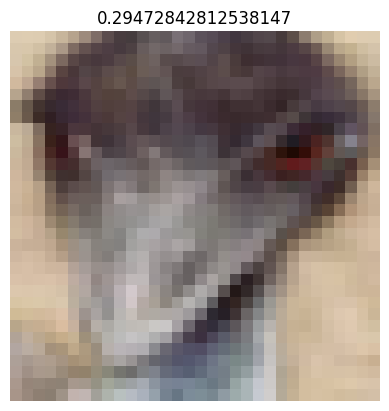

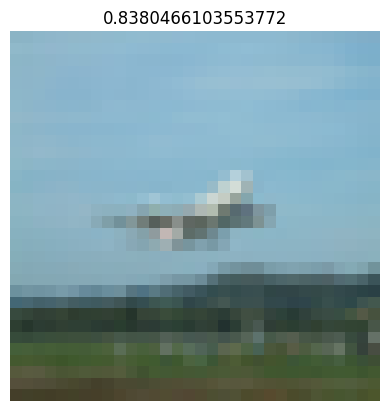

In [28]:
show_images(test_with_predictions[is_correct].sample(3), title='prediction')

Mal clasificados:

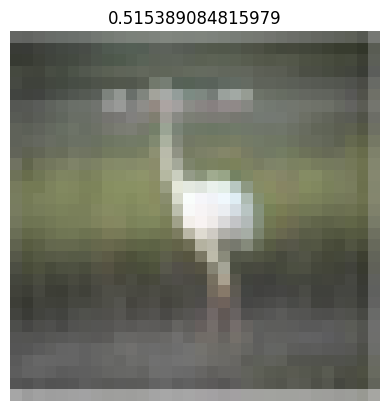

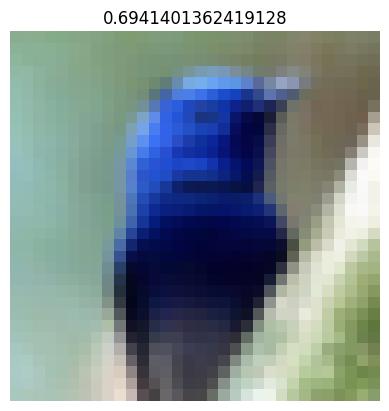

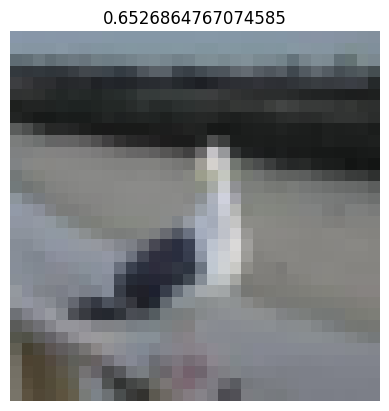

In [31]:
show_images(test_with_predictions[~is_correct].sample(3), title='prediction')